In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
import os

In [50]:
# Load the data from the CSV file into a pandas DataFrame
data = pd.read_csv('Sub_Oil_VLCC_Monthly.csv')
data = data.iloc[1:, :]  # Delete the first row of the dataset

data

,Unnamed: 0,542644,548869,93219,534737,36820,542661,10066,542456,24820,...,543880+543332+542784+530997+530785,535034+535038+542800+543348+543896,543924+543376+542828+535086,542832+542696+543380+543928,543932+542700+542836+543384,547724+543360+547728+543908+547720+542812+547716+531033,543888+542792+543340+531025,543372+543368+543920+543916+542692+542688+542824+542820,543364+543912+542684+542816,8852013+8852220+10743960+10778824+10778836+10743901+10778899+10779132
1,19910201,149.0800,421.4927,115.66667,276.2600,95.750,140.6300,280.000,136.6500,307.280,...,56664.570000,73207.630000,89338.320000,80358.930000,85764.820000,81404.760000,68741.690000,80129.440000,54080.590000,13.15000
2,19910301,119.0500,368.1324,86.33333,190.7900,80.800,107.5100,199.200,106.0300,226.210,...,35121.180000,48163.420000,55941.780000,51293.410000,52934.020000,52744.530000,42298.800000,54990.750000,33230.870000,13.20000
3,19910401,121.9400,387.0115,79.66667,200.2700,77.000,110.7000,191.375,108.9800,235.200,...,19576.480000,30092.690000,31844.400000,30321.090000,29244.860000,36829.640000,23218.850000,36851.860000,18186.700000,13.51000
4,19910501,125.7900,462.6200,82.80000,199.6400,78.600,114.9600,197.200,112.9100,234.610,...,34175.280000,47063.810000,54475.450000,50017.240000,51492.530000,58368.520000,41137.780000,53887.000000,32315.440000,13.05000
5,19910601,122.5400,388.6436,93.25000,205.3700,91.000,111.3600,206.750,109.5900,240.040,...,43616.420000,58039.140000,69111.090000,62754.860000,65880.240000,69364.430000,52726.070000,64903.730000,41452.580000,13.41000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,20230901,684.4500,576.0000,568.45000,1024.2000,603.600,711.9000,1054.800,659.7000,1022.900,...,30863.310778,25898.544058,48481.681142,45368.326005,50994.194898,55121.678414,32958.539815,54409.884701,36524.003032,11.51250
393,20231001,660.3750,656.1875,524.37500,970.3125,556.625,700.1250,1014.750,664.6875,973.000,...,42638.283715,50128.701163,63854.584045,65398.069490,70789.307587,65391.097779,45001.265013,72728.810396,49016.415023,11.68875
394,20231101,629.7500,688.1875,489.75000,919.5625,521.875,713.3125,936.125,686.7500,880.875,...,61926.342563,67212.546340,87067.677940,82487.096193,89553.720260,88069.251739,65533.770453,87299.379274,60576.883930,11.88625
395,20231201,588.4500,589.7000,494.65000,868.7500,503.700,681.8500,881.800,615.7000,804.650,...,52011.115747,59195.962123,70954.699113,67922.393093,71746.666697,72573.820342,54569.016270,73118.989011,47718.064695,11.77250


In [51]:
columns = data.columns[1:] # (this the input) extrcats column names from the dataset, excluding the first column

features = ['542236', '67321', '549295', '41108', '541982']

In [52]:
#Hyperparameter for Ridge Regression
rr_hparams = {
    'alpha': 1,         # Regularization strength (higher values indicate stronger regularization)
    'solver': 'auto',   # Algorithm to use for optimization ('auto' automatically selects between solvers)
    'tol': 0.001,       # Tolerance for stopping criteria
    'max_iter': 50,     # Maximum number of iterations
}

# Hyperparameters for MLP
mlp_hparams = {
    'hidden_layer_sizes': (50, 50, 50),     # Sizes of hidden layers in the neural network
    'activation': 'relu',                   # Activation function for hidden layers  
    'max_iter': 50,                         # Maximum number of iterations               
    'learning_rate_init': .1,               # Initial learning rate
}

# Hyperparameter for GRadient Boosting
gb_hparams = {
    'n_estimators': 100,    # Number of boosting stages
    'learning_rate': 0.1,   # Learning rate (shrinkage parameter)
}

# Hyperparameter for XGBoost
xgb_hparams = {
    'max_depth':6,              # Maximum depth of a tree
    'min_child_weight': 1,      # Minimum sum of instance weight (Hessian) needed in a child
    'eta':.3,                   # Step size shrinkage used in update to prevents overfitting
    'subsample': 1,             # Subsample ratio of the training instances
    'colsample_bytree': 1,      # Subsample ratio of columns when constructing each tree          
    'objective':'reg:linear',   # Learning task and objective function
    'random_state':42           # Seed for random number generation
}

In [53]:
# Models/Algorithms used
models = {
    'Ridge Regression': Ridge(**rr_hparams),
    'MLP': MLPRegressor(**mlp_hparams),
    'Gradient Boosting': GradientBoostingRegressor(**gb_hparams),
    'Random Forest': RandomForestRegressor(), 
    'XGBoost': XGBRegressor(**xgb_hparams)
}

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:243: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [15:33:42] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


Feature: 542236
Ridge Regression: Accuracy = 92.79%
MLP: Accuracy = 0.60%
Gradient Boosting: Accuracy = 92.93%
Random Forest: Accuracy = 92.65%
XGBoost: Accuracy = 92.69%


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:243: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


KeyboardInterrupt: 

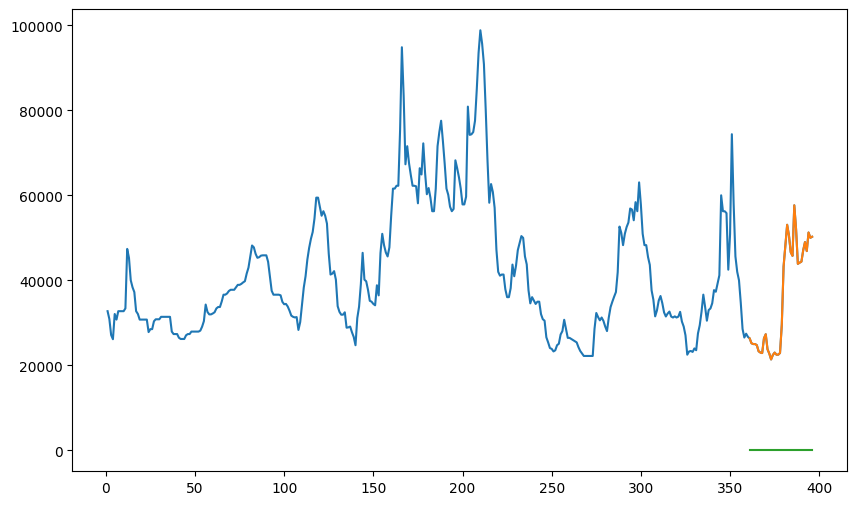

In [54]:
# Iterate over each feature
for feature in features:
    # Data Preparation
    X =data.iloc[:, 1:]     # all columns of the dataset except the first one
    a = data[feature]       # the column corresponding to ht ecurrent feature being processed
    y = a.iloc[:-1]         # all rows of 'a' except the last one(to align y wiht x for training)
    
    n = len(data)-36        # i sset to the length of the dataset mnus 36 to reserve the last 36 rows for testing

    # Split data into train and test sets
    X_train = X.iloc[:n]  
    y_train = y.iloc[:n]
    
    X_test = X.iloc[n:]
    y_test = y.iloc[n-1:]

    # Pre-processing Technique: Standardization and PCA
    scaler = StandardScaler()  # Standardize the features
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    pca = PCA(n_components=1)  # Dimensionality Reduction - PCA is applied
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    # Model training and evaluation
    accuracies = {}  # Store accuracies of different models
    
    bestAccMean = 0.0  # Initialize best mean accuracy
    
    bestAcc = 0        # Initialize best accuracy
    
    modelName = "model"  # Initialize best model name
    
    
    
    for name, model in models.items():
        # Train the model
        model.fit(X_train, y_train) 
        
        # Predict the target values 
        y_pred = model.predict(X_test)  
        
        # Calculate mean accuracy
        accuracy = 100 * (1 - np.abs((y_test - y_pred) / y_test)).mean() 
        
        # Calculate accuracy for all 36 months 
        az = 100 * (1 - np.abs((y_test - y_pred) / y_test)) 
        
        # Extract the last 36 months
        last_36_months = data.index[-36:]


        # Update best accuracy if current accuracy is better
        if accuracy > bestAccMean:
            bestAccMean = accuracy
            bestAcc = az
            modelName = y_pred
        
        # Store accuracy in the dictionary
        accuracies[name] = accuracy

    # Print accuracies for each model
    print(f"Feature: {feature}")
    for name, accuracy in accuracies.items():
        print(f"{name}: Accuracy = {accuracy:.2f}%")

    # Visualize the results
    plt.figure(figsize=(10, 6))
    plt.plot(data.index, data[feature], label='Actual')  # Plot vs. actual values
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        plt.plot(data.index[-36:], y_pred, label=name)  # Plot vs. predicted values for each model
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.title(f'Predictions for Feature: {feature}')
    plt.legend()
    plt.show()

    
    # Save results to Excel
    # Initialize best predicted values
    bestAccuracy = y_pred   
    
    df = pd.DataFrame({
        'Year': last_36_months,
        'Target Values': y_test, 
        'Predicted Values': modelName,
        'Accuracy': bestAcc
    })
    df.to_excel(feature + ".xlsx", index=False)

# Identify the best model based on highest accuracy
best_model = max(accuracies, key=accuracies.get)
print(f"The best model is: {best_model} with an accuracy of {accuracies[best_model]:.2f}%")
